# Analiza Danych - Użytkownicy Kart Kredytowych

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_csv('09_Credit Card customers.csv')

In [6]:
df = df[df.columns[:-2]]

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
element_counts = df['Gender'].value_counts().reset_index()
element_counts.columns = ['Płeć', 'Ilosć']
print(element_counts)

  Płeć  Ilosć
0    F   5358
1    M   4769


## W powyzszej tabeli możemy zauważyc ilość użytkowików płci żeńskiej i męskiej.

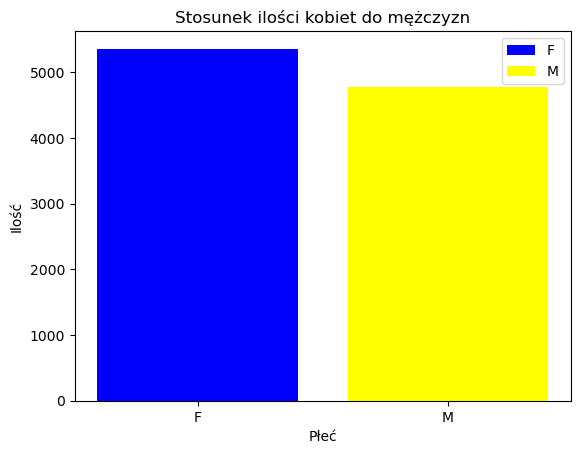

In [101]:
element_counts = df['Gender'].value_counts()

bars = plt.bar(element_counts.index, element_counts.values, color=['blue','yellow'])

plt.title('Stosunek ilości kobiet do mężczyzn')
plt.xlabel('Płeć')
plt.ylabel('Ilość')

plt.legend(bars, element_counts.index)

plt.show()

### Chociaż przeważaja kobiety ilość jest bardzo zbliżona do siebie. 

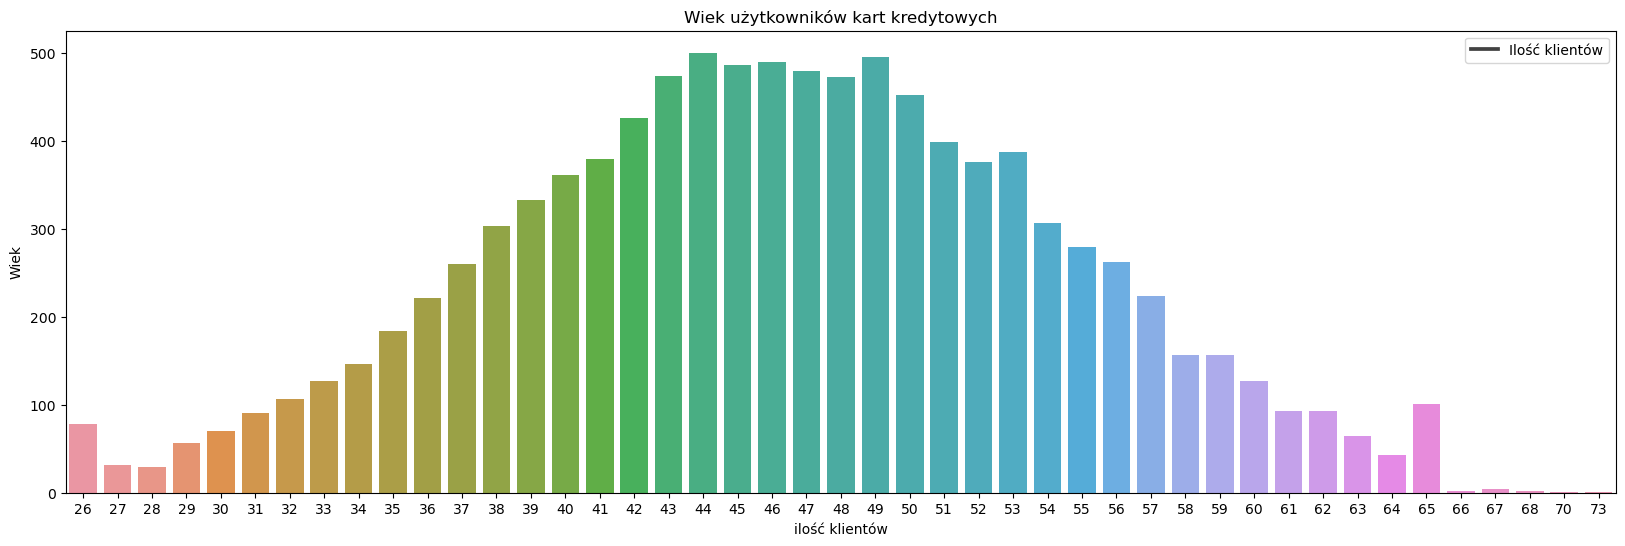

In [105]:
element_counts = df['Customer_Age'].value_counts()

ax = sns.barplot(x=element_counts.index, y=element_counts.values)

fig = plt.gcf()
fig.set_size_inches(20, 6)

plt.title('Wiek użytkowników kart kredytowych')
plt.xlabel('Wiek')
plt.ylabel('Ilość Klientów')

plt.show()

In [50]:
average = df['Customer_Age'].mean().round()
print(average)

46.0


In [ ]:
### Dzięki wykresowi możemy zauważyć że ilość użytkowników rośnie równomiernie z wiekiem aż do lat 44. Później utrzymuje się ilość klientów w miare na podobnym poziomie aż do wieku 49 po którym ilość użytkowników zaczyana w miare proporcionalnie spadac do wzrastającego wieku.
### Dzięki obliczenią możemy zobaczyć że przeciętny wiek użytkownika wyniosi 46lat.

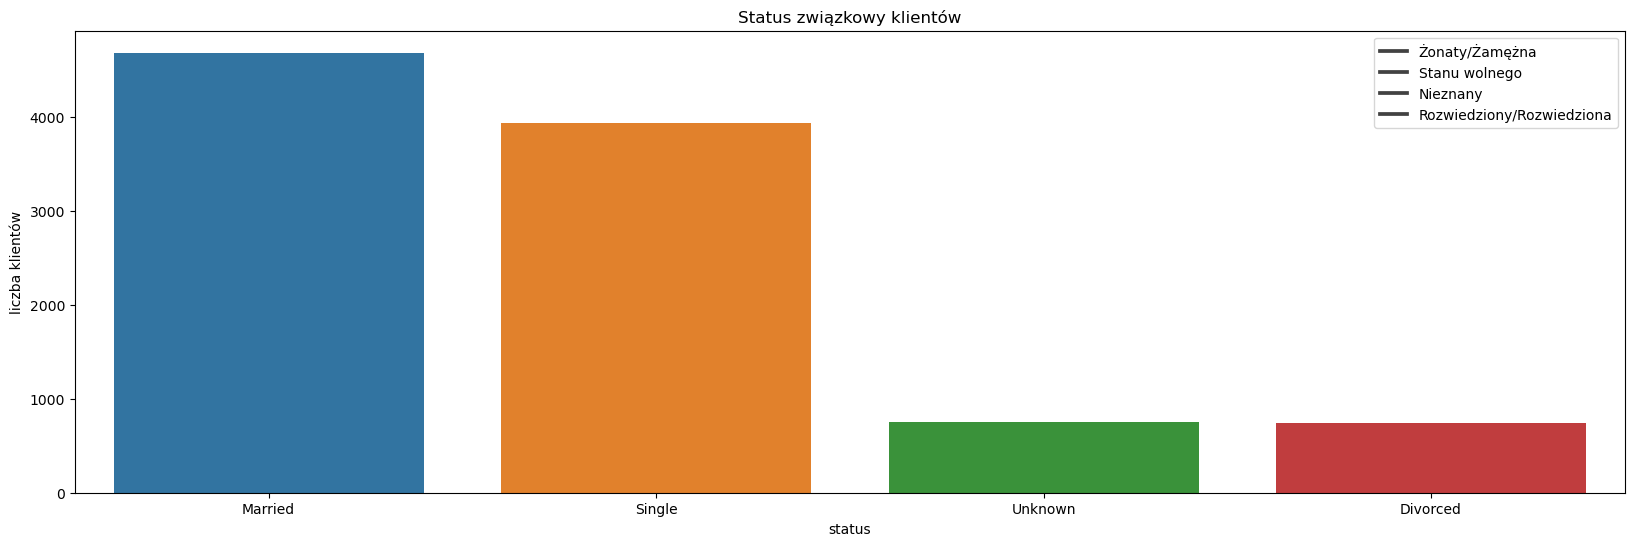

In [123]:
element_counts = df['Marital_Status'].value_counts()

ax = sns.barplot(x=element_counts.index, y=element_counts.values)

fig = plt.gcf()
fig.set_size_inches(20, 6)

plt.title('Status związkowy klientów')
plt.xlabel('status')
plt.ylabel('liczba klientów')

status_labels = {'Married': 'Żonaty/Żamężna', 'Single': 'Stanu wolnego', 'Divorced': 'Rozwiedziony/Rozwiedziona',  'Unknown': 'Nieznany'}
legend_labels = [status_labels.get(status) for status in element_counts.index]

plt.legend(legend_labels)

plt.show()

In [124]:
element_counts = df['Marital_Status'].value_counts(normalize=True) * 100
element_counts = element_counts.reset_index().round()
element_counts.columns = ['Status', 'Procent']

print(element_counts)

     Status  Procent
0   Married     46.0
1    Single     39.0
2   Unknown      7.0
3  Divorced      7.0


### Prawie połowa użytkowników jest osobami zamężnymi/żonatymi. 

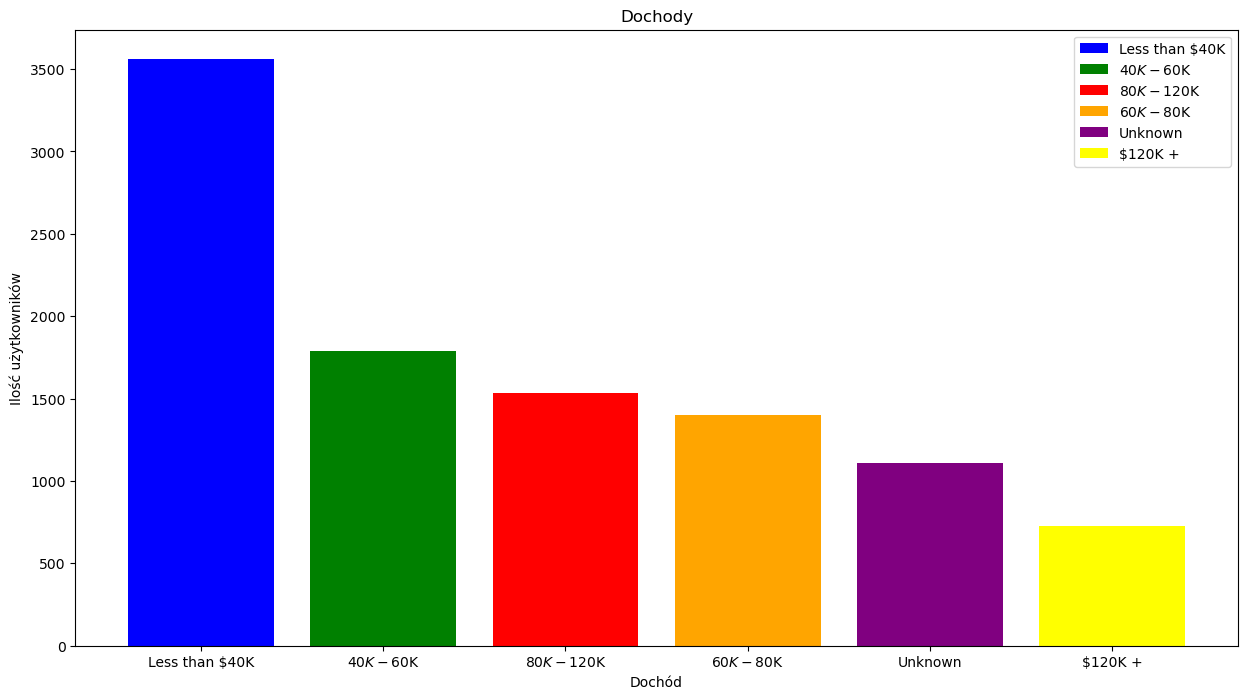

In [127]:
element_counts = df['Income_Category'].value_counts()

plt.bar(element_counts.index, element_counts.values)
fig = plt.gcf()
fig.set_size_inches(15, 8)

bars2 = plt.bar(element_counts.index, element_counts.values, color=['blue', 'green', 'red', 'orange', 'purple', 'yellow'])

plt.title('Dochody')
plt.xlabel('Dochód')
plt.ylabel('Ilość użytkowników')

plt.legend(bars2, element_counts.index)
plt.show()

### Wśród użytkowaników kart kredytowych dominują osoby z dochodnem mniejszym niż $40k.

Text(0.5, 1.0, 'Stosunek dochodów do limitu karty kredytowej')

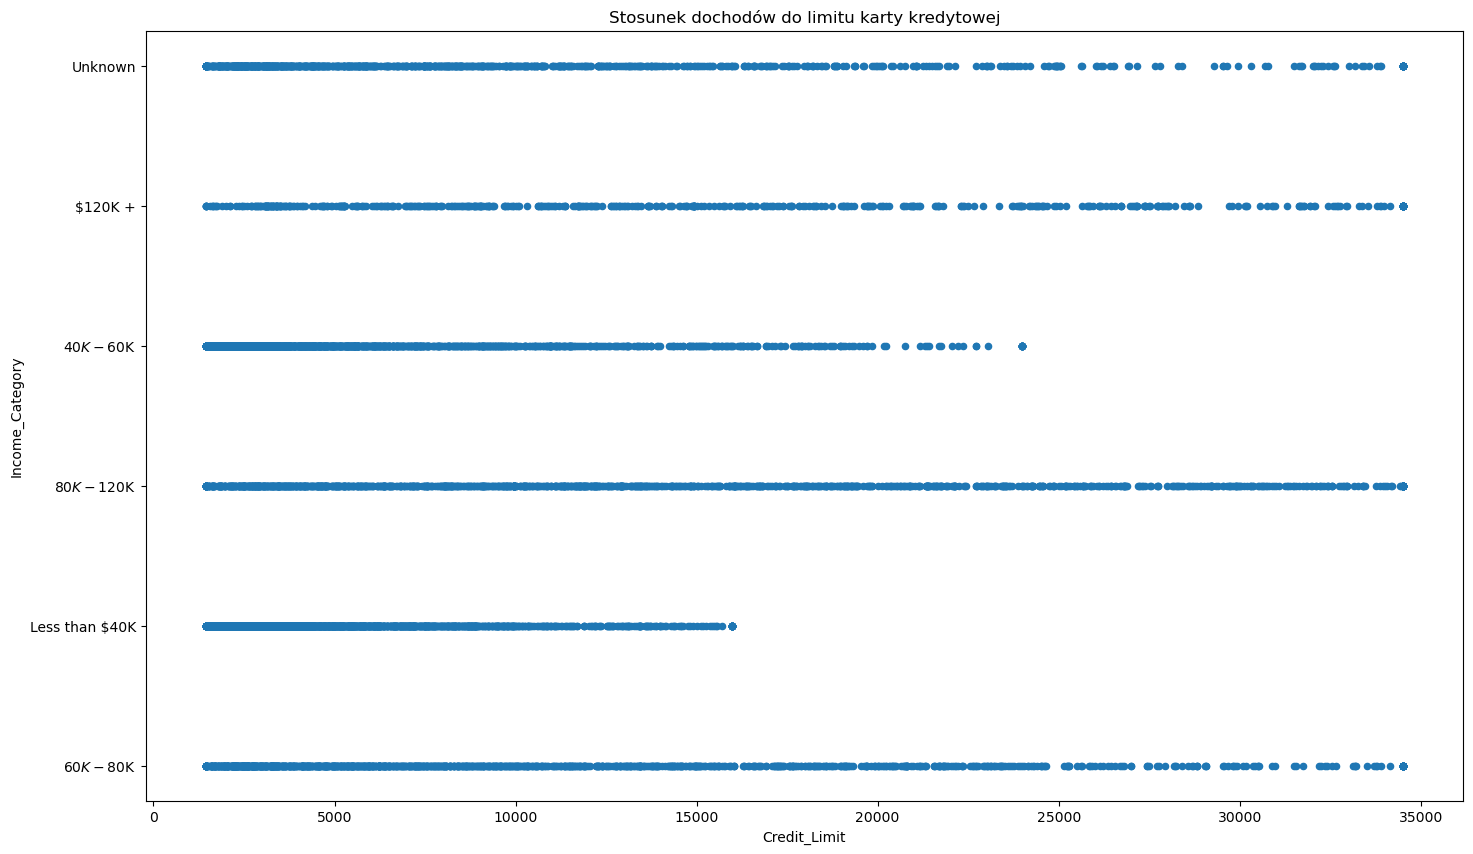

In [61]:
df.plot.scatter(y = 'Income_Category', x = 'Credit_Limit')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Stosunek dochodów do limitu karty kredytowej')

### Przeważający limit karty kredytowej jest napewno poniżej 20000. Z racji na to że przeważajaca liczba klientów jest w kategori dochodwej "less than 40K", która nie przekracza limitu karty o 20000. Jednak wszyscy z dochodem powyżej 60k ustawiają limity karty w prawie każdym zakresie jaki jest dostepny.

In [69]:
df['Months_on_book'].describe().round()

count    10127.0
mean        36.0
std          8.0
min         13.0
25%         31.0
50%         36.0
75%         40.0
max         56.0
Name: Months_on_book, dtype: float64

### Okres współprac z bankiem najmniej wynosi 13 miesięcy natomiast najwięcej 46. 

<Axes: ylabel='Frequency'>

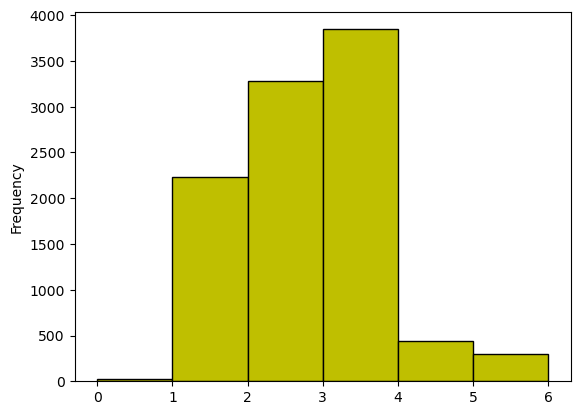

In [74]:
df['Months_Inactive_12_mon'].plot.hist(bins = 6, color = 'y', edgecolor = 'black', linewidth = 1)

### Uzytkownicy najczęsciej są nieaktywni od misiąca do czterech.

In [79]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [88]:
tabela = df[['Total_Trans_Ct' , 'Total_Trans_Amt']]
tabela.sort_values(by = 'Total_Trans_Ct')

,Total_Trans_Ct,Total_Trans_Amt
653,10,646
1867,10,695
2554,10,741
144,10,530
425,11,975
...,...,...
9261,131,13740
9629,132,12920
9213,134,14880
9586,138,13939


### Zapomocą sortowania zostało ukazana suma wykonanych tranzakcji do ich sumy wartości pieniężnej wszystkich tranzakcji. Oczywiście wraz z wzrastającą ilością tranzakcji wzrasta wartośc pieniężna.

In [91]:
df['Avg._No._Contacts_Count_12_mon'] = df['Contacts_Count_12_mon'].mean().round()
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg._No._Contacts_Count_12_mon
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,2.0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,2.0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,2.0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,2.0
